# Siffergjenkjenning

Problemet i forrige eksempel er fint å varme opp med,
men paradegrenen til dyp læring er problemer der vi ikke kjenner en eksakt Sannhet.
MNIST problemet er så stort at vi må begynne å tenke på kjøretiden til programmet.
Det er også en stor fordel å ha kode man stoler på at er riktig før man går hit,
for hvis det er feil kan man bli sittende mye og vente på at det genereres søppel.

In [9]:
%run funksjonalitet.ipynb

In [10]:
from loader import get_dataset

training_images, training_labels = get_dataset('training')
test_images, test_labels = get_dataset('testing')

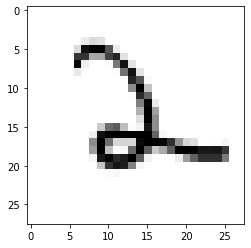

In [104]:
import matplotlib.pyplot as plt
from random import randint
i = randint(0,12000)
image = training_images[:,i]
image = np.reshape(image, (28,28))
plt.imshow(image, cmap='Greys')

In [72]:
K = 10
width = 784
h = 0.1
model = Model(K, width, h)
op = AdamBatch(model, training_images, training_labels, test_images, test_labels, maxiter=500, batch_size=150)

In [73]:
op.run()

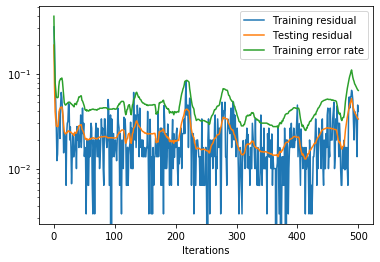

0.012621268999003888
0.02524271844660194


In [74]:
%matplotlib inline

plot_convergence(op)
print(min(op.testing_residuals))
print(min(op.error_rates))

In [75]:
op = AdamBatch(model, training_images, training_labels, test_images, test_labels, maxiter=200, batch_size=500)

In [76]:
op.run()

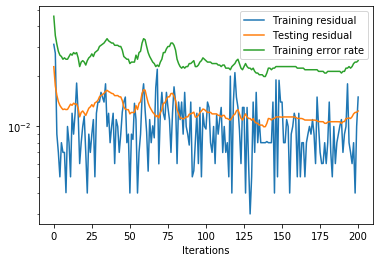

0.009952232074591031
0.019902912621359223


In [77]:
%matplotlib inline

plot_convergence(op)
print(min(op.testing_residuals))
print(min(op.error_rates))

In [86]:
op = AdamNonBatch(op.model, training_images, training_labels, test_images, test_labels, maxiter=40)
op.run()

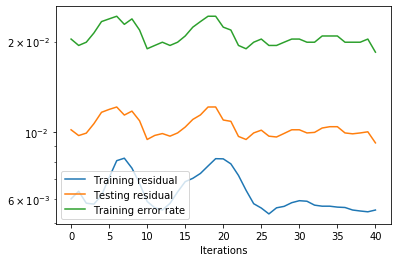

0.018446601941747572


In [87]:
plot_convergence(op)
min(op.residuals)
print(min(op.error_rates))

In [84]:
op = PlainNonBatch(op.model, training_images, training_labels, test_images, test_labels, maxiter=40, 𝜏=0.001)
op.run()

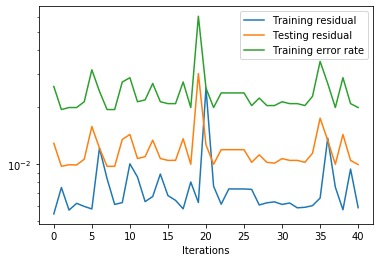

0.019417475728155338


In [85]:
plot_convergence(op)
min(op.residuals)
print(min(op.error_rates))